In [1]:
import pandas as pd
import numpy as np

# 14.3 US Baby Names 1880 - 2010

In [2]:
names1880 = pd.read_csv('Datasets/Wesm/Baby_names/yob1880.txt', names=['name','sex','births'])

In [3]:
pd.options.display.max_rows = 10

In [4]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [5]:
""" Nombre de naissances par an """

' Nombre de naissances par an '

In [6]:
names1880.groupby('sex').births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

## Mixer tout le bordel

In [7]:
years = range(1880,2011)

In [8]:
columns = ['name','sex','births']

In [9]:
pieces = []

In [10]:
for year in years:
    path ='Datasets/Wesm/Baby_names/yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)
    

In [11]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1691891,Zymaire,M,5,2010
1691892,Zyonne,M,5,2010
1691893,Zyquarius,M,5,2010
1691894,Zyran,M,5,2010


In [12]:
# 
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [13]:
total_births.tail()

sex,F,M
year,,
2006,1899166,2053065
2007,1920231,2072975
2008,1888177,2037309
2009,1834048,1980491
2010,1774186,1915331


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

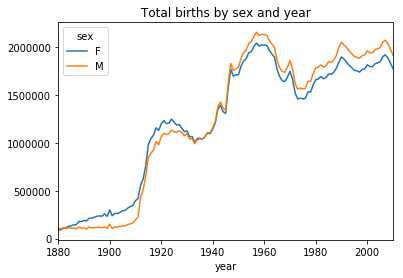

In [15]:
total_births.plot(title='Total births by sex and year')

In [16]:
# colonne prop pour la propension de noms de bébés donnés
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [17]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
...,...,...,...,...,...
1691891,Zymaire,M,5,2010,0.000003
1691892,Zyonne,M,5,2010,0.000003
1691893,Zyquarius,M,5,2010,0.000003
1691894,Zyran,M,5,2010,0.000003


In [18]:
#verifier que la somme des prop donne '1'
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [19]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [20]:
pieces = [] 
for year, group in names.groupby(['year', 'sex']): 
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [21]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
...,...,...,...,...,...
261872,Simeon,M,196,2010,0.000102
261873,Reuben,M,196,2010,0.000102
261874,Keshawn,M,196,2010,0.000102
261875,Eliezer,M,196,2010,0.000102


## Analyzing Naming Trends

In [22]:
# diviser le dataset en Hommes et Femmes

In [23]:
boys = top1000[top1000.sex == 'M']

In [24]:
gilrs = top1000[top1000.sex == 'F']

In [25]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [26]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6870 entries, Aaden to Zuri
dtypes: float64(6870)
memory usage: 6.9 MB


In [27]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3743.0,NaN,8294.0,NaN,NaN,298.0,NaN,404.0,440.0,...,NaN,5152.0,2849.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3955.0,NaN,8933.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4933.0,3032.0,527.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,956.0,4038.0,219.0,8536.0,NaN,NaN,321.0,NaN,344.0,401.0,...,NaN,4781.0,3445.0,493.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x15708C70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x15785EF0>], dtype=object)

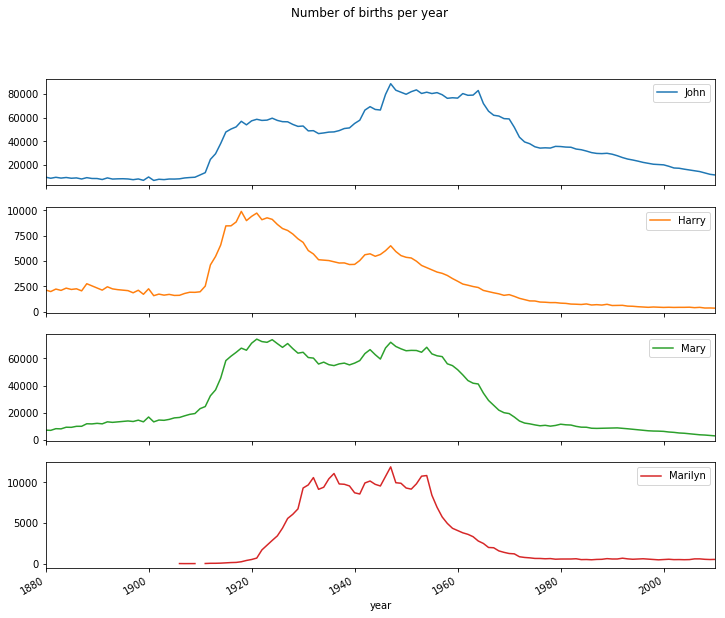

In [29]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

### Measuring the increase in naming diversity

In [30]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

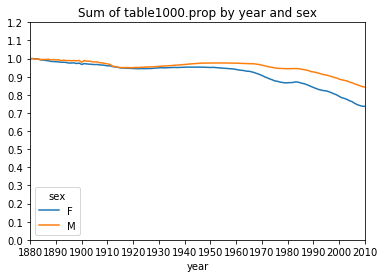

In [31]:
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [32]:
df = boys[boys.year == 2010]

In [33]:
df

,name,sex,births,year,prop
260877,Jacob,M,22110,2010,0.011544
260878,Ethan,M,17995,2010,0.009395
260879,Michael,M,17336,2010,0.009051
260880,Jayden,M,17163,2010,0.008961
260881,William,M,17042,2010,0.008898
...,...,...,...,...,...
261872,Simeon,M,196,2010,0.000102
261873,Reuben,M,196,2010,0.000102
261874,Keshawn,M,196,2010,0.000102
261875,Eliezer,M,196,2010,0.000102


In [34]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011544
260878    0.020939
260879    0.029990
260880    0.038951
260881    0.047849
260882    0.056593
260883    0.065178
260884    0.073441
260885    0.081550
260886    0.089633
Name: prop, dtype: float64

In [35]:
prop_cumsum.values.searchsorted(0.5)

116

In [36]:
#comparer avec l'année 1900

In [37]:
df = boys[boys.year == 1900]

In [39]:
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [40]:
in1900.values.searchsorted(0.5) + 1

25

In [41]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [42]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)

In [43]:
diversity = diversity.unstack('sex')

In [44]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


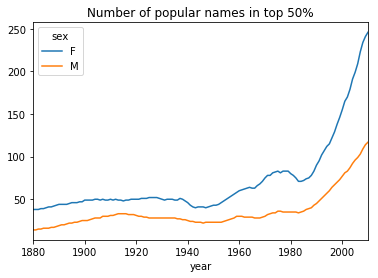

In [45]:
diversity.plot(title="Number of popular names in top 50%")

### The "last letter" revolution

In [46]:
#extract last letter from name column
get_last_letter = lambda x : x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [47]:
table = names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc=sum)

In [48]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [49]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691272.0  676436.0    977.0    5211.0   28846.0
b                 NaN     694.0     455.0    411.0    3912.0   39252.0
c                 5.0      49.0     955.0    482.0   15463.0   23332.0
d              6751.0    3729.0    2639.0  22113.0  262170.0   44795.0
e            133601.0  435062.0  316555.0  28665.0  178809.0  130187.0

In [50]:
#normaliser la table
subtable.sum()

sex  year
F    1910     396502.0
     1960    2022104.0
     2010    1774186.0
M    1910     194215.0
     1960    2132705.0
     2010    1915331.0
dtype: float64

In [51]:
letter_prop = subtable / subtable.sum()

In [52]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273383  0.341858  0.381266  0.005031  0.002443  0.015061
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000538  0.002482  0.007250  0.012182
d            0.017026  0.001844  0.001487  0.113858  0.122928  0.023388
e            0.336949  0.215153  0.178423  0.147594  0.083841  0.067971
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001450
w            0.000020  0.000031  0.001189  0.006323  0.007710  0.016175
x            0.000015  0.000037  0.000729  0.003965  0.001850  0.008597
y            0.110975  0.152553  0.116761  0.077342  0.160973  0.058187
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001826

[26 rows x 6 columns]

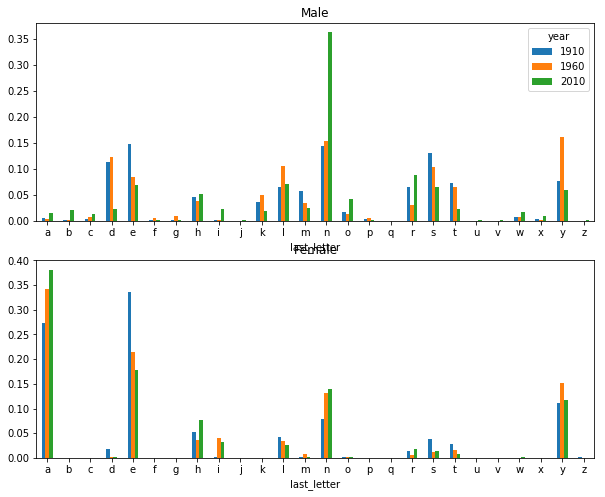

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [54]:
plt.subplots_adjust(hspace=0.25)

In [56]:
#normaliser
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


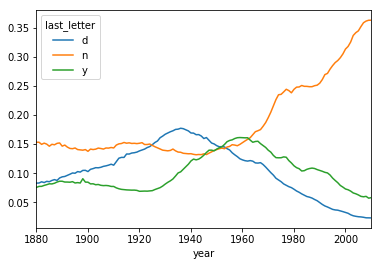

In [57]:
dny_ts.plot()

### Boys name that became girls name

In [58]:
#noms commencçant par les
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4731     Lesli
6107     Lesly
dtype: object

In [59]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    370562
Lesly      10072
Name: births, dtype: int64

In [60]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


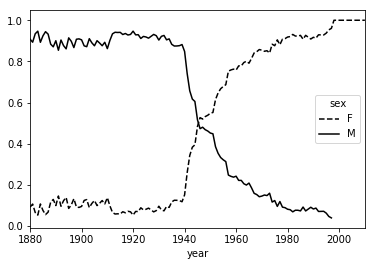

In [61]:
table.plot(style={'M': 'k-', 'F': 'k--'})